# CS520: Data Curation Project Report

** Team Members: **<br>
*[Adarsh Srinivasa](mailto:asrinivasa@hawk.iit.edu)*<br>
*[Chethan Bhaskar](mailto:cbhaskar@hawk.iit.edu)*<br>
*[Shashank Ravindranath](mailto:sravindranath@hawk.iit.edu)*<br>

## Data Source: Lending Dataset

### Objective: To apply the techniques learned in class to clean and integrate one or more real world datasets.

** Dataset Description: **

These files contain complete loan data for all loans issued through the 2007-2015, including the current loan status (Current, Late, Fully Paid, etc.) and latest payment information. The file containing loan data through the "present" contains complete loan data for all loans issued through the previous completed calendar quarter. Additional features include credit scores, number of finance inquiries, address including zip codes, and state, and collections among others. The file is a matrix of about 56k+ observations and 75 variables. 

Uncleaned dataset can be found with file name as ** LoanData.xslx **


*** Data Curation Problems Identified: ***

- Duplicate ID's
- Null Values
- Date Format issues
- Inconsistent case
- City Column missing

*** Tools and Languages Used: ***

- R Programming to clean the data
- Jupyter Notebook to create Report
- Tableau and  Pyramid Analytics for creating Visualizations

### 1. Duplicate ID's 

** Duplicate Rows with primary keys were identified and removed **

  Here is a few sample rows depicting the issue:
  
 ** id &emsp;&emsp;&emsp;&emsp;   member_id &nbsp;&nbsp;&nbsp;&nbsp; loan_amnt &nbsp;&nbsp;&nbsp;&nbsp; funded_amnt &nbsp;&nbsp;&nbsp;&nbsp; funded_amnt_inv &nbsp;&nbsp;&nbsp;&nbsp; term &nbsp;&nbsp;&nbsp;&nbsp; int_rate &nbsp;&nbsp;&nbsp;&nbsp; installment &nbsp;&nbsp;&nbsp;&nbsp; grade &nbsp;&nbsp;&nbsp;&nbsp; sub_grade **
 
  361774 &emsp;&emsp;&emsp; 370535 &emsp;&emsp;&emsp; 6400 &emsp;&emsp;&emsp;&emsp;  6400 &emsp;&emsp;&emsp;&emsp;&emsp;  6400 &emsp;&emsp;&emsp;&emsp;  36 months &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  8.49 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&emsp;  202.01 &emsp;&emsp;&emsp;&emsp;  B &emsp;&emsp;&emsp;  B1  ....
   
   361774 &emsp;&emsp;&emsp; 370535 &emsp;&emsp;&emsp; 6400 &emsp;&emsp;&emsp;&emsp;  6400 &emsp;&emsp;&emsp;&emsp;&emsp;  6400 &emsp;&emsp;&emsp;&emsp;  36 months &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  8.49 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&emsp;  202.01 &emsp;&emsp;&emsp;&emsp;  B &emsp;&emsp;&emsp;  B1  ....

 ** Code snippet in R to solve the same: **
 
    nodup <- loandata[!duplicated(loandata$id),]

### 2. Null Values

We found some records with value as **empty in "emp_title" column **.
So, we have identified those empty cells and fixed by ** inserting "NA" with the help of R Programming **. 
Because, we wanted to treat that column as a categorical column and do some data analysis on that.

** Below is the sample of the data which had issue: **

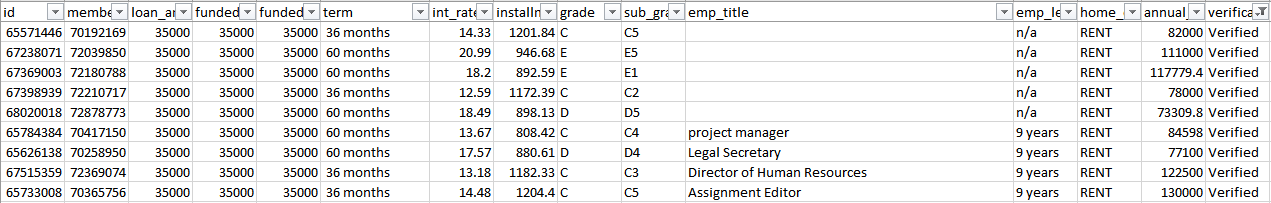

In [1]:
from IPython.display import Image
Image(filename="Visualization/Emplyoee_Title_Null.png", width=1000, height=100)

We solved this problem with the help of ** R programming ** and replaced empty cell value with ** "NA" **

** Below is the code snippet we used to fix: **

nodup1 <- nodup <br>

empty_title <- which(is.na(nodup1\$emp_title)) <br>
nodup1\$emp_title[empty_title] <- "NA" <br>
head(nodup1\$emp_title) <br>

** After fixing the issue this is how the data looks like: **

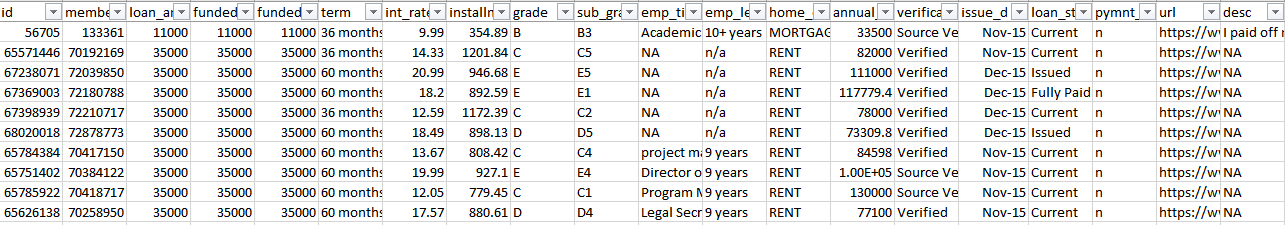

In [24]:
from IPython.display import Image
Image(filename="Visualization/Emplyoee_Title_Null_Fixed.png", width=1000, height=100)

### 3. Date Format Issues

Date Format Issues had inconsistent data format as mmm-yyyy in some records and mmm-yy in some records. 
So, we have identified and corrected formatting issue with help of  R programming and formatted date as mmm-yy.

** Sample Records with the issue are: **

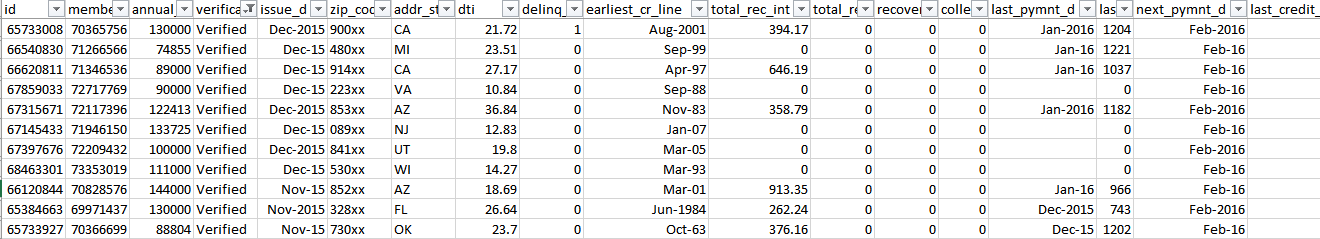

In [25]:
from IPython.display import Image
Image(filename="Visualization/Date_Format_Issue.png", width=1000, height=100)

** Code snippet in R to solve the problem: **

    nodup1 <- nodup

    install.packages(("lubridate"))
    library(lubridate)


    nodup1$issue_d = format(as.Date(nodup1$issue_d), "%d-%b-%Y")
    nodup1$issue_d = substr(as.character(nodup1$issue_d), 4,11)
    tail(nodup1$issue_d, n =50)

Date formatting issue was with many columns which had dates. 
We fixed with the help of same set of code as above, by changing the column name in it.

** After fixing the issue this is how the data looks like: **

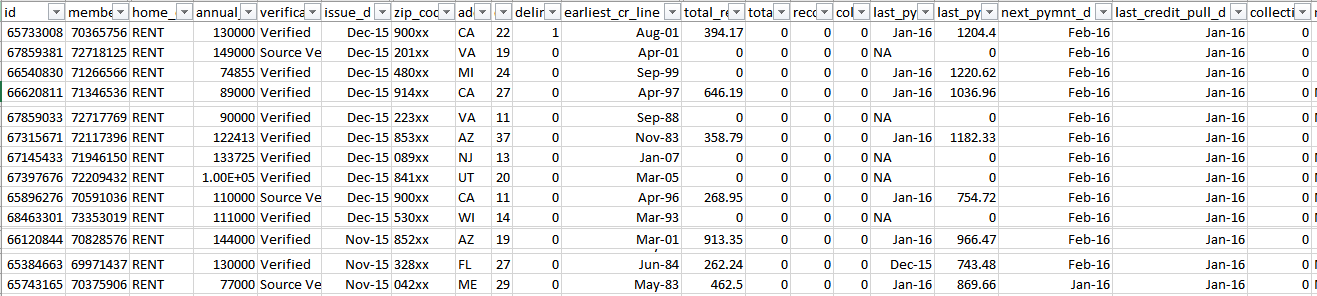

In [26]:
from IPython.display import Image
Image(filename="Visualization/Date_Format_Issue_Fixed.png", width=1000, height=100)

### 4. Inconsistent case

We found a issue with inconsistent case on a categorical column. The column we had issue was  
So, we have identified those column and fixed with the help of R programming.

** Sample Records with the issue are: **

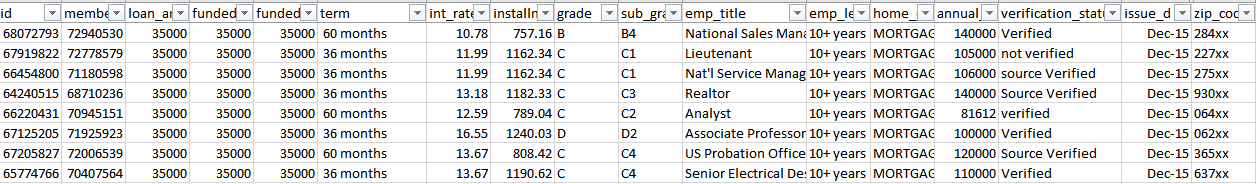

In [27]:
from IPython.display import Image
Image(filename="Visualization/Case_Inconsistency.png", width=1000, height=100)

** Code snippet in R to solve the problem: **

install.packages("stringr") <br>
library("stringr") <br>

str_replace(nodup\$verification_status, "verified", "Verified") <br>
str_replace(nodup\$verification_status, "not verified", "Not Verified") <br>
str_replace(nodup\$verification_status, "source verified", "Source Verified") <br>

** After fixing the issue this is how the data looks like: **

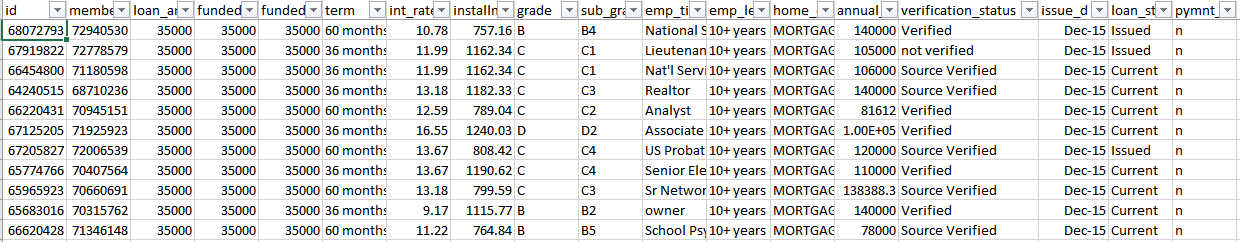

In [28]:
from IPython.display import Image
Image(filename="Visualization/Case_Inconsistency_Fixed.png", width=1000, height=100)

### 5. City Column missing

We found column which has ZipCode with 5 digit value in format "606xx" and we had a column which specifies the state which it belongs. 
We wanted a column that shows to which City that zip code belongs. Because, we can slice or drill down based on the geographical  hirearchy as State, City and ZipCode.

So we found a data which includes a mapping between ZipCode and City. We joned this dataset with our original dataset to get the mapping. We did this with the help of R Programming.

** Below is the data before the city column: **

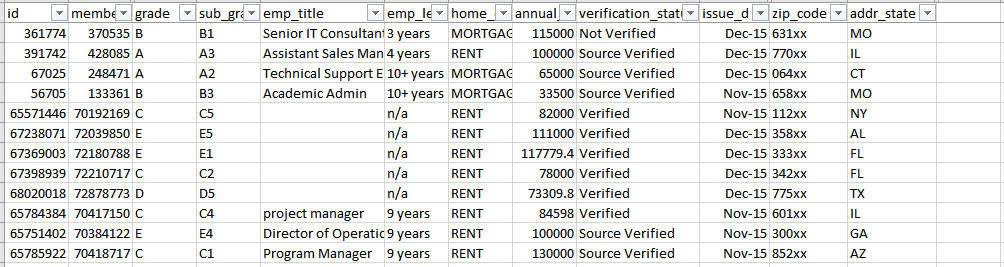

In [29]:
from IPython.display import Image
Image(filename="Visualization/City_Column_Missing.png", width=1000, height=100)

** Code snippet in R to solve the problem: **

zip_city <- read_excel("postal_codes.xlsx") <br>
head(zip_city) <br> 

zip_city\$Zip.Code <- substr(zip_city\$Zip.Code, 1,3) <br>
zip_city\$Zip.Code <- str_pad(zip_city\$Zip.Code , width =5, side = "right", pad = "x") <br>
colnames(zip_city) <- c("Zip"  ,         "Place.Name"      ,   "State"        ,      "State.Abbreviation"
                        ,"County"       ,      "Latitude"     ,      "Longitude", "","zip_code") <br>
                        
names(zip_city) <br>

install.packages("dplyr") <br>
library(dplyr)<br>

zip_city_unique <- zip_city[!duplicated(zip_city\$zip_code),c(2,9)] <br>
nrow(zip_city_unique) <br>
joined_data <- left_join(nodup1, zip_city_unique, by = c("zip_code")) <br>
tail(joined_data\$Place.Name, n = 65) <br>

** After fixing the issue this is how the data looks like: **

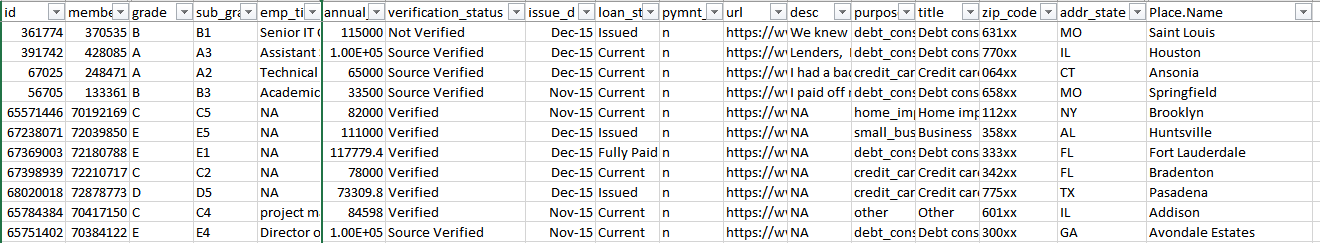

In [30]:
from IPython.display import Image
Image(filename="Visualization/City_Column_Added.png", width=1000, height=100)

### Cleaned dataset

After fixing all the data problems we exported the data from R to csv. 

** Below is the code snippet of R Code: **

install.packages("csv") <br>
library("csv") <br>

write.csv(joined_data, "./Cleaned_LoanData.csv") <br>

Cleaned dataset can be found with file name as ** Cleaned_LoanData.csv **

### Visualization

Visualization is created to showcase how the cleaned dataset can be utilized in Data Analysis. Here are a few depictions created using Tableau and Pyramid Analytics tool.

### Avg Loan Amount by Subgrade

** Sunburst Visualization. **

In the below visualization, we can see Average Loan amount of all the members by subgrade for each state on a Sunburst view.


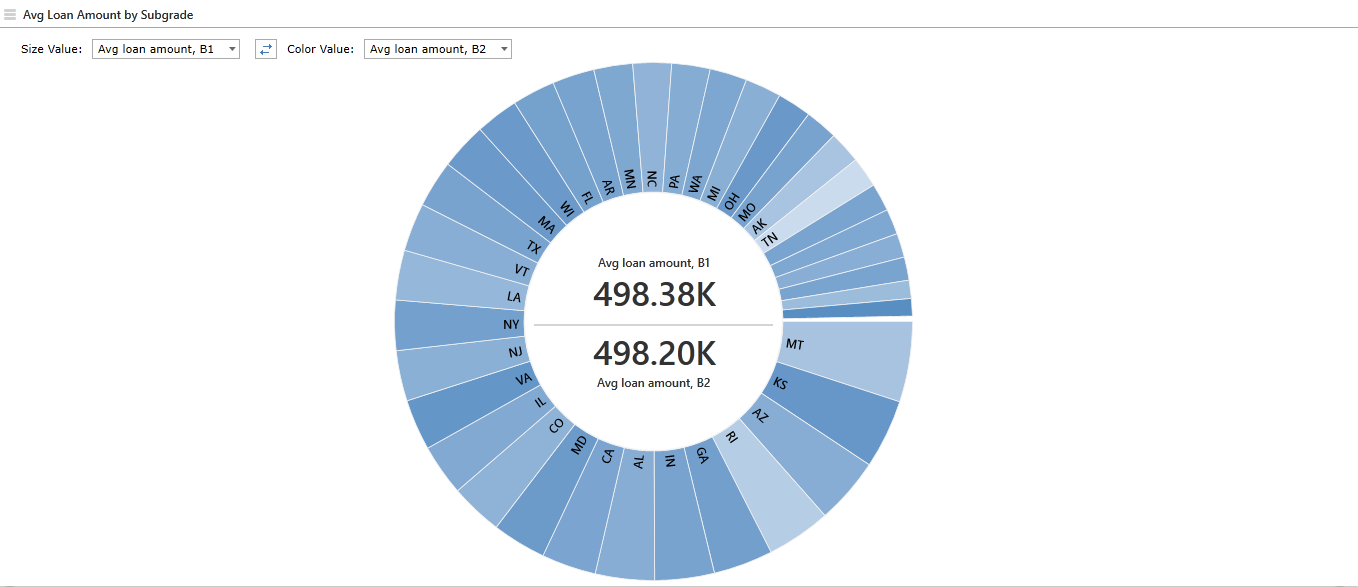

In [31]:
from IPython.display import Image
Image(filename="Visualization/Avg Loan Amount by Subgrade.png", width=1000, height=1000)

### Average Annual Income and Average Loan Amount vs Grade

** Bar Graph with dual axis ** <br>
In this visualization we are showing, what is the average loan amount taken by a member with average income of X-amount based on the Grade which he belongs to.

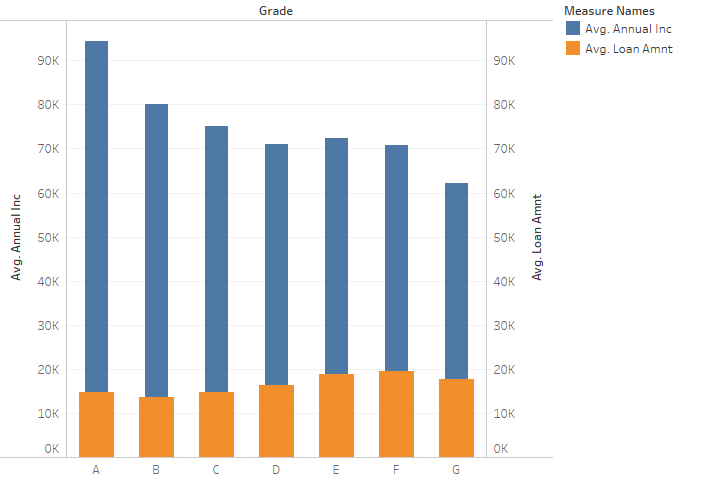

In [32]:
Image(filename="Visualization/Avg. Anual Inc and Avg. Loan Amt vs Grade.png", width=700, height=700)

### Average Loan Amount vs State

** Geographic Visualization **

In this visualization we are showing, what is the average loan amount taken by each state across US. 
We used colored gradient to show this on Map, the state with lowest average loan amount taken will be represented with Yellowish-Green color and with highest average loan is represented with Dark-Green color.

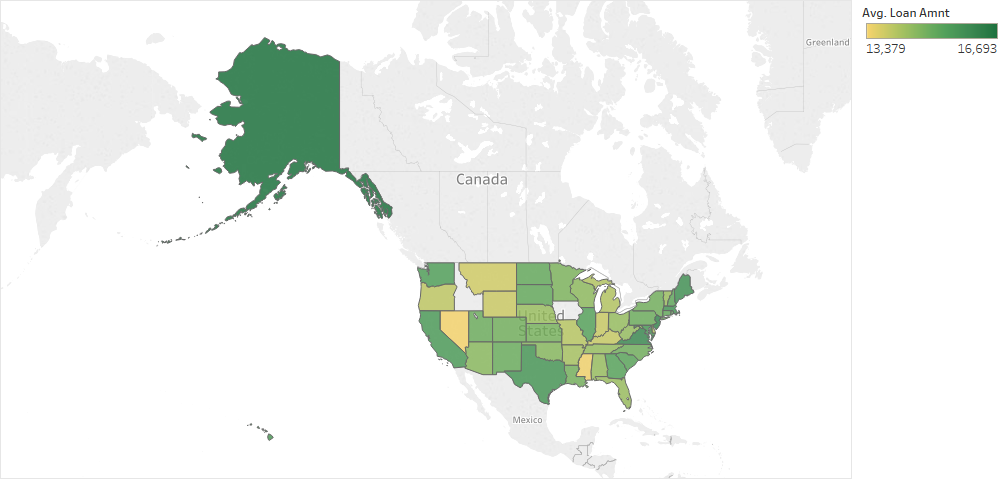

In [33]:
Image(filename="Visualization/Avg. Loan Amount vs State.png", width=1000, height=1000)

### Grade vs Interest Rate

** Trend Shape View ** <br>
In this visualization we are showing, what is the trend of Interest rate based on the SubGrades of members. 
We can see that the member with SubGrade A1 has lowest interest rate and SubGrade G1 has higest Interest rate. We represted each Grade with different color.

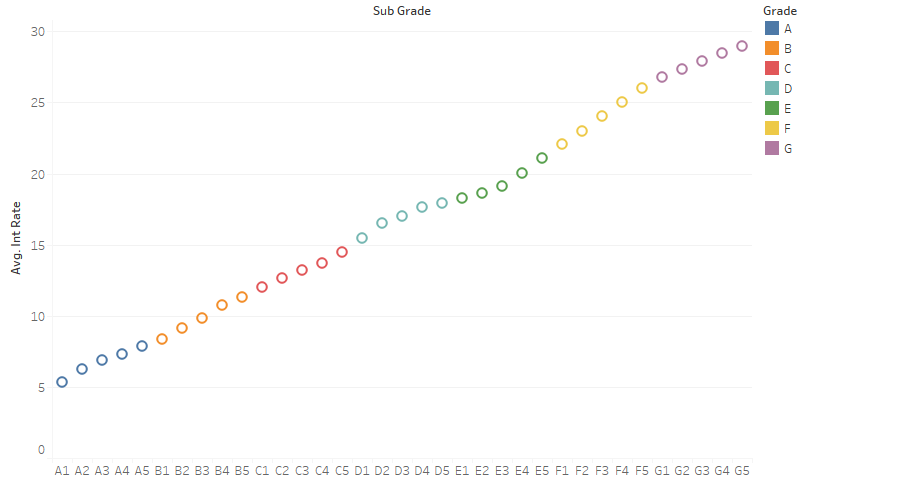

In [34]:
Image(filename="Visualization/Grade vs Interest Rate.png", width=1000, height=1000)

### Interest Rate vs Average Annual Income

** Line Graph ** <br>
In this visualization we are showing, what is the trend of Interest Rate on Average Anual Income of a member. To get the trend, we created bins for Interest rate as there are lot of values in it.

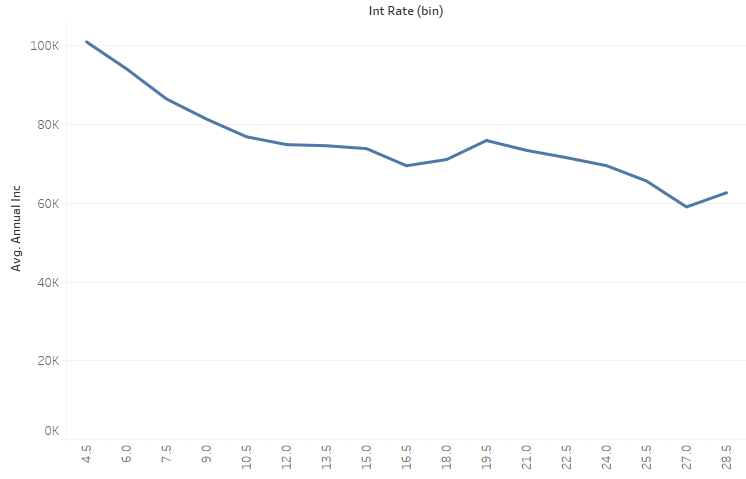

In [35]:
Image(filename="Visualization/Interest Rate vs Avg. Annual Income.png", width=1000, height=1000)

### Loan Amount vs Home Ownership

** Bar Graph ** <br>
In this visualization we are showing, Sum of loan amount given out by the Lending Company, by keeping the stake on Home Ownership. 

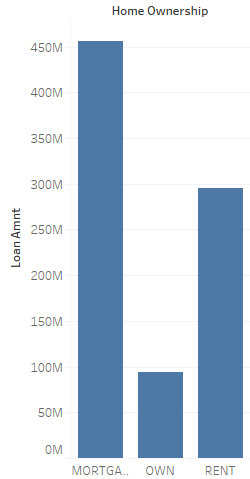

In [36]:
Image(filename="Visualization/Loan Amount vs Home Ownership.png", width=200, height=200)

### State vs Avg. Interest Rate

** Geographic View ** <br>
In this visualization we are showing, What is the State average Interest rate. We used gradient on Map view to show how it varies, State with lowest Average Interest Rate is shown with Yellowish-Green color and with highest Average Interest Rate is shown with Dark-Green color.


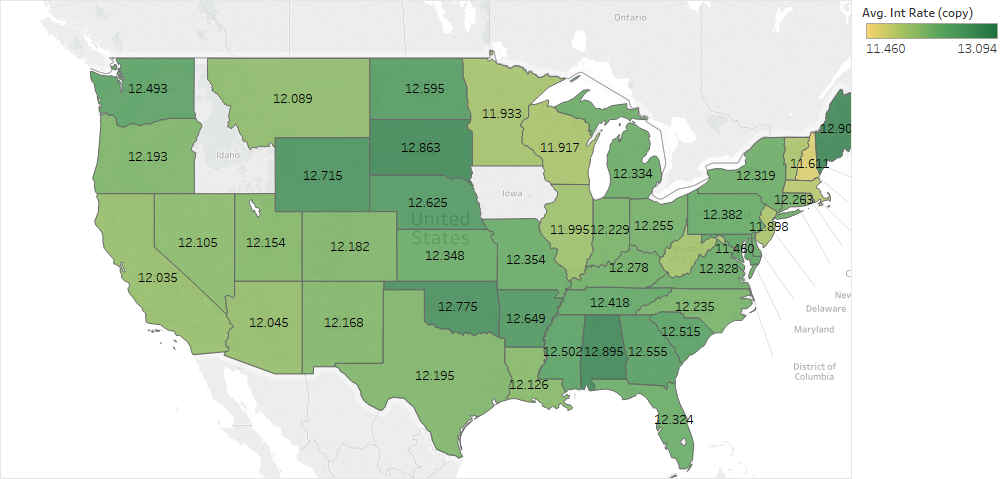

In [37]:
Image(filename="Visualization/State vs Avg. Interest Rate.png", width=1000, height=1000)

### Problems Faced during Data Cleaning Process:

- Leading 0's in Zip Codes were getting trimmed when it was **imported to R **which was causing comparison issues <br> ** Eg: 01581 **
- While fixing Data Format, converted data was showing with Timezone included, which we didnt want. <br> ** Eg: 12/01/2012 UTC **
- To decide what value to fill for the column that has empty values. We resolved it by looking at the data dictonary of that dataset and understanding the importance of having value for that column. Finally, if it was categorical column we inserted "N/A" otherwise, we left it as is.